# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

Epoch 48/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense) 

50000/50000 [==============================] - 4s 89us/step - loss: 0.3817 - acc: 0.8616 - val_loss: 2.1645 - val_acc: 0.5269
Epoch 50/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3819 - acc: 0.8632 - val_loss: 2.2723 - val_acc: 0.5175
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 5s 99us/step - loss: 0.8704 - acc: 0.6949 - val_loss: 1.3771 - val_acc: 0.5358
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3424 - acc: 0.1025 - val_loss: 2.3014 - val_acc: 0.1119
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.2847 - acc: 0.1325 - val_loss: 2.2710 - val_acc: 0.1536
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2616 - acc: 0.1593 - val_loss: 2.2525 - val_acc: 0.1709
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2447 - acc: 0.1724 - val_loss: 2.2371 - val_acc: 0.1814
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2298 - acc: 0.1841 - val_loss: 2.2228 - val_acc: 0.1906
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2160 - acc: 0.1953 - val_loss: 2.2093 - val_acc: 0.1989
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2028 - acc: 0.2042 - val_loss: 2.1962 - val_acc

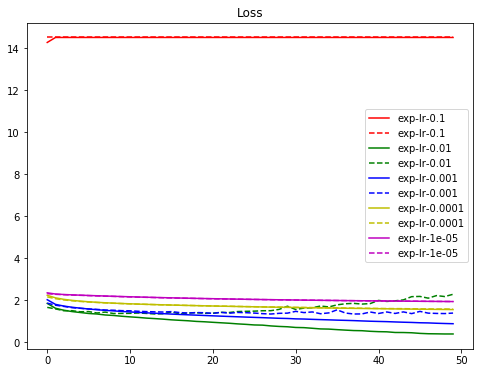

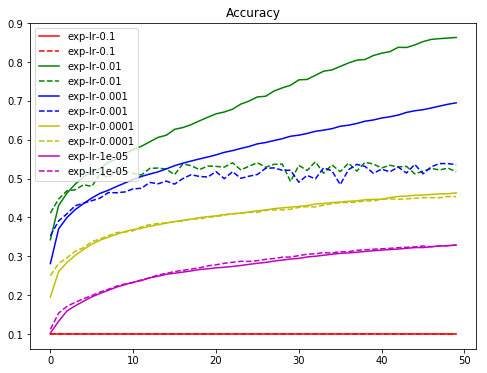

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 107us/step - loss: 14.4433 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss

50000/50000 [==============================] - 5s 105us/step - loss: 2.3119 - acc: 0.2147 - val_loss: 1.9501 - val_acc: 0.2782
Epoch 2/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8833 - acc: 0.3174 - val_loss: 1.8263 - val_acc: 0.3338
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7774 - acc: 0.3636 - val_loss: 1.7538 - val_acc: 0.3537
Epoch 4/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7064 - acc: 0.3883 - val_loss: 1.7162 - val_acc: 0.3827
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.6474 - acc: 0.4079 - val_loss: 1.6773 - val_acc: 0.3904
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6034 - acc: 0.4245 - val_loss: 1.6353 - val_acc: 0.4128
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5569 - acc: 0.4416 - val_loss: 1.6489 - val_acc: 0.4164
Epoch 8/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 98us/step - loss: 1.7938 - acc: 0.3668 - val_loss: 1.7276 - val_acc: 0.3903
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7141 - acc: 0.3920 - val_loss: 1.7027 - val_acc: 0.3984
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6587 - acc: 0.4149 - val_loss: 1.7831 - val_acc: 0.3715
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6168 - acc: 0.4284 - val_loss: 1.6138 - val_acc: 0.4193
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5782 - acc: 0.4418 - val_loss: 1.6575 - val_acc: 0.4060
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5498 - acc: 0.4506 - val_loss: 1.6196 - val_acc: 0.4242
Epoch 8/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5176 - acc: 0.4636 - val_loss: 1.5878 - val_acc: 0.4218
Epoch 9/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 98us/step - loss: 1.8757 - acc: 0.3453 - val_loss: 1.8578 - val_acc: 0.3426
Epoch 4/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8324 - acc: 0.3631 - val_loss: 1.8188 - val_acc: 0.3632
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8004 - acc: 0.3740 - val_loss: 1.7988 - val_acc: 0.3665
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7740 - acc: 0.3840 - val_loss: 1.7845 - val_acc: 0.3728
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7508 - acc: 0.3904 - val_loss: 1.7455 - val_acc: 0.3913
Epoch 8/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7301 - acc: 0.3985 - val_loss: 1.7329 - val_acc: 0.3998
Epoch 9/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7111 - acc: 0.4058 - val_loss: 1.7171 - val_acc: 0.3958
Epoch 10/50
50000/50000 [===========================

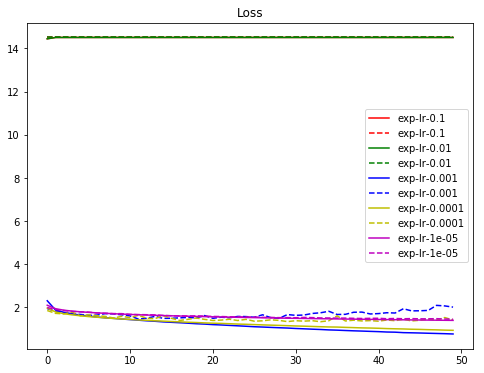

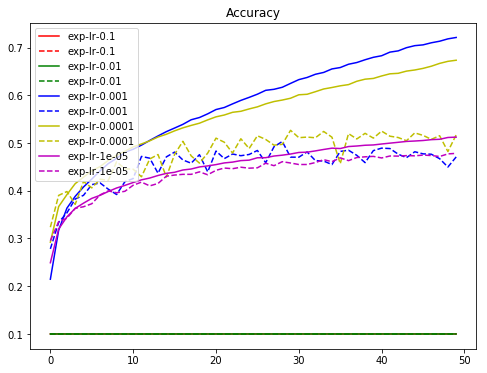

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.4382 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5041 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 5s 98us/step - loss: 2.0000 - acc: 0.2798 - val_loss: 1.8976 - val_acc: 0.3272
Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8111 - acc: 0.3615 - val_loss: 1.7860 - val_acc: 0.3639
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7393 - acc: 0.3869 - val_loss: 1.7100 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6906 - acc: 0.4080 - val_loss: 1.6801 - val_acc: 0.4084
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6547 - acc: 0.4200 - val_loss: 1.6610 - val_acc: 0.4123
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6252 - acc: 0.4314 - val_loss: 1.6254 - val_acc: 0.4310
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6011 - acc: 0.4404 - val_loss: 1.6160 - val_acc: 0.4323
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8895 - acc: 0.3412 - val_loss: 1.8788 - val_acc: 0.3450
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8620 - acc: 0.3506 - val_loss: 1.8563 - val_acc: 0.3543
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8413 - acc: 0.3584 - val_loss: 1.8387 - val_acc: 0.3579
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8243 - acc: 0.3638 - val_loss: 1.8226 - val_acc: 0.3682
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8104 - acc: 0.3695 - val_loss: 1.8120 - val_acc: 0.3736
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7983 - acc: 0.3744 - val_loss: 1.7981 - val_acc: 0.3740
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7877 - acc: 0.3780 - val_loss: 1.7898 - val_acc: 0.3803
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 5s 93us/step - loss: 2.2065 - acc: 0.2123 - val_loss: 2.1982 - val_acc: 0.2251
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1906 - acc: 0.2248 - val_loss: 2.1839 - val_acc: 0.2360
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1771 - acc: 0.2357 - val_loss: 2.1714 - val_acc: 0.2443
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.1653 - acc: 0.2439 - val_loss: 2.1602 - val_acc: 0.2505
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1547 - acc: 0.2505 - val_loss: 2.1501 - val_acc: 0.2564
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1452 - acc: 0.2561 - val_loss: 2.1408 - val_acc: 0.2610
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1365 - acc: 0.2609 - val_loss: 2.1325 - val_acc: 0.2641
Epoch 11/50
50000/50000 [==========================

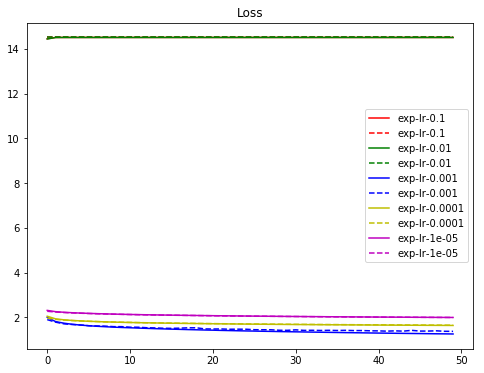

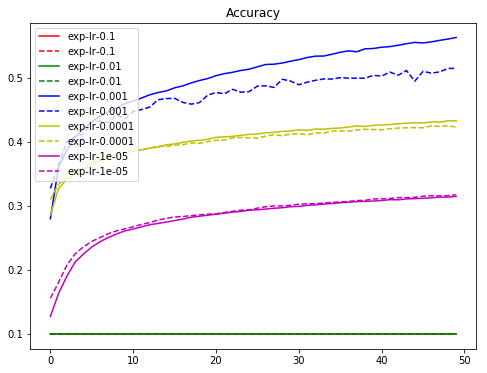

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 123us/step - loss: 14.4477 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 6s 119us/step - loss: 1.9357 - acc: 0.3013 - val_loss: 1.7611 - val_acc: 0.3786
Epoch 2/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7054 - acc: 0.3903 - val_loss: 1.6440 - val_acc: 0.4133
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6114 - acc: 0.4257 - val_loss: 1.6373 - val_acc: 0.4151
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5616 - acc: 0.4446 - val_loss: 1.5261 - val_acc: 0.4569
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5093 - acc: 0.4595 - val_loss: 1.5426 - val_acc: 0.4388
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4706 - acc: 0.4751 - val_loss: 1.5048 - val_acc: 0.4570
Epoch 7/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.4436 - acc: 0.4854 - val_loss: 1.4573 - val_acc: 0.4796
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 112us/step - loss: 1.7136 - acc: 0.3952 - val_loss: 1.6558 - val_acc: 0.4162
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6348 - acc: 0.4234 - val_loss: 1.6018 - val_acc: 0.4382
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5736 - acc: 0.4447 - val_loss: 1.5762 - val_acc: 0.4482
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5297 - acc: 0.4617 - val_loss: 1.5256 - val_acc: 0.4640
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4928 - acc: 0.4755 - val_loss: 1.5973 - val_acc: 0.4283
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4646 - acc: 0.4842 - val_loss: 1.4863 - val_acc: 0.4756
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4312 - acc: 0.4940 - val_loss: 1.4589 - val_acc: 0.4820
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 120us/step - loss: 1.8488 - acc: 0.3508 - val_loss: 1.8234 - val_acc: 0.3602
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8034 - acc: 0.3703 - val_loss: 1.7920 - val_acc: 0.3682
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7707 - acc: 0.3804 - val_loss: 1.7656 - val_acc: 0.3787
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7428 - acc: 0.3901 - val_loss: 1.7342 - val_acc: 0.3940
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7188 - acc: 0.3990 - val_loss: 1.7110 - val_acc: 0.3996
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6982 - acc: 0.4077 - val_loss: 1.6976 - val_acc: 0.4002
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6796 - acc: 0.4145 - val_loss: 1.6788 - val_acc: 0.4101
Epoch 10/50
50000/50000 [====================

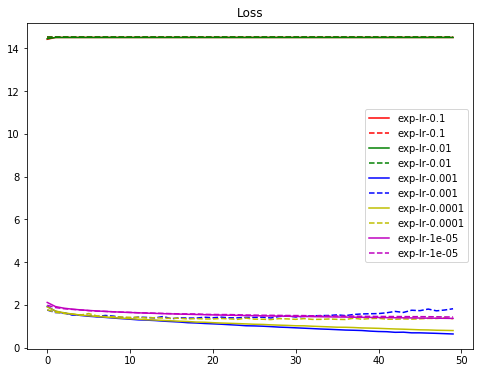

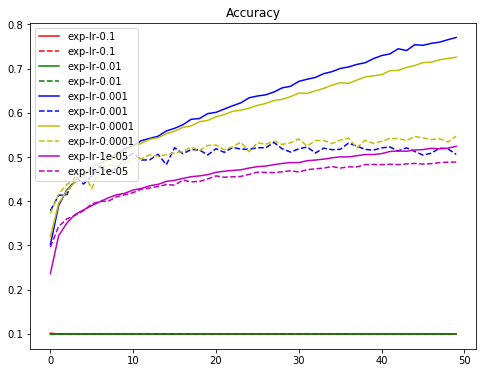

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()